In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import io

In [9]:
df = pd.read_csv('\\ML_Hospitability\Data\Data-final.csv')
print(df)

      P_RADIUS_EST   P_MASS_EST  P_SEMI_MAJOR_AXIS_EST     P_PERIOD  \
0        12.082709  6165.863300                1.29000   326.030000   
1        12.229641  4684.784800                1.53000   516.219970   
2        12.848516  1525.574400                0.83000   185.840000   
3        12.865261  1481.078500                2.93000  1773.400000   
4        13.421749   565.733850                1.66000   798.500000   
...            ...          ...                    ...          ...   
2908      1.870000     4.155456                0.13456    28.165600   
2909      2.760000     8.047485                0.05769     7.906961   
2910      1.102775     1.380000                0.02100     3.204000   
2911      1.178333     1.750000                0.03500     6.689000   
2912      1.164989     1.680000                0.05400    13.031000   

          P_FLUX  P_TEMP_EQUIL  S_MASS   S_RADIUS  S_TEMPERATURE  \
0     101.011410     799.44963    2.70  19.000000         4742.0   
1     107.3

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:,12]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix:
[[855   2]
 [  0  17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       0.89      1.00      0.94        17

    accuracy                           1.00       874
   macro avg       0.95      1.00      0.97       874
weighted avg       1.00      1.00      1.00       874

Accuracy: 99.77%


Confusion Matrix:
[[855   2]
 [  0  17]]
Accuracy: 99.77%
Feature: 0, Score: 0.15099
Feature: 1, Score: 0.14742
Feature: 2, Score: 0.10200
Feature: 3, Score: 0.10486
Feature: 4, Score: 0.15235
Feature: 5, Score: 0.11781
Feature: 6, Score: 0.03078
Feature: 7, Score: 0.04941
Feature: 8, Score: 0.05704
Feature: 9, Score: 0.02806
Feature: 10, Score: 0.02638
Feature: 11, Score: 0.03290


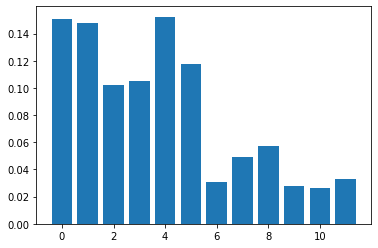

In [8]:
print("Confusion Matrix:")
print(result)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()